# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Firman Hendrawan]
- **Email:** [firmansykes54@gmail.com]
- **ID Dicoding:** [firmanh_31]

## Menentukan Pertanyaan Bisnis

- 1. Berapa rata-rata perhari penyewa sepeda dalam setiap bulan?
- 2. Apakah lebih banyak pelanggan kasual atau pelanggan terdaftar yang menyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
Mengumpulkan data dari bike-sharing-dataset

Memuat tabel day_df

In [314]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat tabel hour_df

In [315]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memuat dataset yang akan digunakan untuk analisis data
- Berdasarkan dataset yang akan digunakan dapat disimpulkan bahwa data yang berada di day.csv dan hour.csv memiliki tipe data yang sama. Namun ada perbedaan pada tipe data yang berada di hour.csv dimana memiliki tipe data bernama hr sedangkan di day.csv tidak ada.

### Assessing Data

Menilai data day_df

In [316]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan informasi output yang didapat data pada day_df tidak ada kekeliruan dan jumlah datanya sudah lengkap

In [317]:
day_df.isna().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Lalu untuk data yang ada pada day_df tidak ada duplikasi data

In [318]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [319]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan informasi output yang didapat data pada hour_df tidak ada kekeliruan dan jumlah datanya sudah lengkap

In [320]:
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Lalu untuk data yang ada pada hour_df tidak ada duplikasi data

In [321]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tipe data dteday dalam kedua data masih dalam bentuk objek harus dirubah kedalam bentuk datetime
- Tipe data diubah untuk melakukan proses perbandingan dalam rentang waktu tertentu
- Tidak ada data yang terduplikat

### Cleaning Data

In [322]:
day_df.temp.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Name: temp, Length: 731, dtype: bool

In [323]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [324]:
hour_df.temp.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Name: temp, Length: 17379, dtype: bool

In [325]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [326]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [327]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**
- Merubah typedata dteday dari objek menjadi datetime
- Tidak ada data yang hilang

## Exploratory Data Analysis (EDA)

### Explore ...

In [328]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [329]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [330]:
day_df.groupby(by="yr").agg({
    "weathersit": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

weathersit   cnt                               
      nunique   max  min         mean          std
yr                                                
0           3  6043  431  3405.761644  1378.753666
1           3  8714   22  5599.934426  1788.667868

In [331]:
hour_df.groupby(by="yr").agg({
    "weathersit": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

weathersit  cnt                            
      nunique  max min        mean         std
yr                                            
0           4  651   1  143.794448  133.797854
1           4  977   1  234.666361  208.910941

In [332]:
day_df.groupby(by="yr").agg({
    "weekday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

weekday   cnt                               
   nunique   max  min         mean          std
yr                                             
0        7  6043  431  3405.761644  1378.753666
1        7  8714   22  5599.934426  1788.667868

In [333]:
total_casual_users = day_df["casual"].sum()
print("Total penyewa sepeda kasual: ", total_casual_users)

Total penyewa sepeda kasual:  620017


In [334]:
total_casual_users = hour_df["casual"].sum()
print("Total penyewa sepeda kasual: ", total_casual_users)

Total penyewa sepeda kasual:  620017


In [335]:
total_casual_users = day_df["registered"].sum()
print("Total penyewa sepeda terdaftar: ", total_casual_users)

Total penyewa sepeda terdaftar:  2672662


In [336]:
total_casual_users = hour_df["registered"].sum()
print("Total penyewa sepeda terdaftar: ", total_casual_users)

Total penyewa sepeda terdaftar:  2672662


In [337]:
total_all_users = day_df["cnt"].sum()
print("Total penyewa sepeda keseluruhan: ", total_all_users)

Total penyewa sepeda keseluruhan:  3292679


In [338]:
day_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False)

weekday
0    104
1    104
2    104
5    104
3    103
4    103
6    102
Name: cnt, dtype: int64

In [339]:
hour_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False)

weekday
3    616
6    609
4    606
2    598
1    595
5    584
0    571
Name: cnt, dtype: int64

In [340]:
day_df.groupby(by="workingday").cnt.nunique().sort_values(ascending=False)

workingday
1    487
0    223
Name: cnt, dtype: int64

In [341]:
hour_df.groupby(by="workingday").cnt.nunique().sort_values(ascending=False)

workingday
1    856
0    676
Name: cnt, dtype: int64

In [342]:
day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

weathersit
1    451
2    243
3     21
Name: cnt, dtype: int64

In [343]:
hour_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

weathersit
1    848
2    649
3    368
4      3
Name: cnt, dtype: int64

In [344]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1              463  8714  431  4876.786177  1879.483989
2              247  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449

In [345]:
hour_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
           nunique  max min        mean         std
weathersit                                         
1            11413  977   1  204.869272  189.487773
2             4544  957   1  175.165493  165.431589
3             1419  891   1  111.579281  133.781045
4                3  164  23   74.333333   77.925178

In [346]:
hour_df.groupby("weathersit")["cnt"].describe()

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,11413.0,204.869272,189.487773,1.0,46.0,159.0,304.0,977.0
2,4544.0,175.165493,165.431589,1.0,40.0,133.0,257.0,957.0
3,1419.0,111.579281,133.781045,1.0,21.0,63.0,152.5,891.0
4,3.0,74.333333,77.925178,23.0,29.5,36.0,100.0,164.0


In [347]:
day_df.groupby("weathersit")["cnt"].describe()

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.5,8714.0
2,247.0,4035.862348,1809.109918,605.0,2674.5,4040.0,5257.5,8362.0
3,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.0,4639.0


In [348]:
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
        nunique   max   min         mean          std
weekday                                              
0           105  8227   605  4228.828571  1872.496629
1           105  7525    22  4338.123810  1793.074013
2           104  7767   683  4510.663462  1826.911642
3           104  8173   441  4548.538462  2038.095884
4           104  7804   431  4667.259615  1939.433317
5           104  8362  1167  4690.288462  1874.624870
6           105  8714   627  4550.542857  2196.693009

In [349]:
hour_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
        nunique  max min        mean         std
weekday                                         
0          2502  776   1  177.468825  168.167710
1          2479  968   1  183.744655  179.514167
2          2453  970   1  191.238891  187.820480
3          2475  977   1  191.130505  190.894464
4          2471  976   1  196.436665  188.011923
5          2487  957   1  196.135907  174.076894
6          2512  783   1  190.209793  179.820569

In [350]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
           nunique   max  min         mean          std
workingday                                             
0              231  8714  605  4330.168831  2052.141245
1              500  8362   22  4584.820000  1878.415583

In [351]:
hour_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
           nunique  max min        mean         std
workingday                                         
0             5514  783   1  181.405332  172.853832
1            11865  977   1  193.207754  185.107477

In [352]:
day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
        nunique   max   min         mean          std
holiday                                              
0           710  8714    22  4527.104225  1929.013947
1            21  7403  1000  3735.000000  2103.350660

In [353]:
hour_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                           
        nunique  max min       mean         std
holiday                                        
0         16879  977   1  190.42858  181.981435
1           500  712   1  156.87000  156.757478

**Insight:**
- Didapatkan hasil jumlah penyewa sepeda casual sebanyak 620.017 orang sedangkan penyewa sepeda yang sudah terdaftar sebanyak 2.672.662 orang.
- Penyewa sepeda banyak melakukan penyewaan sepeda pada musim ketika cuaca cerah dan mendung berkabut.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa rata-rata perhari penyewa sepeda dalam setiap bulan?

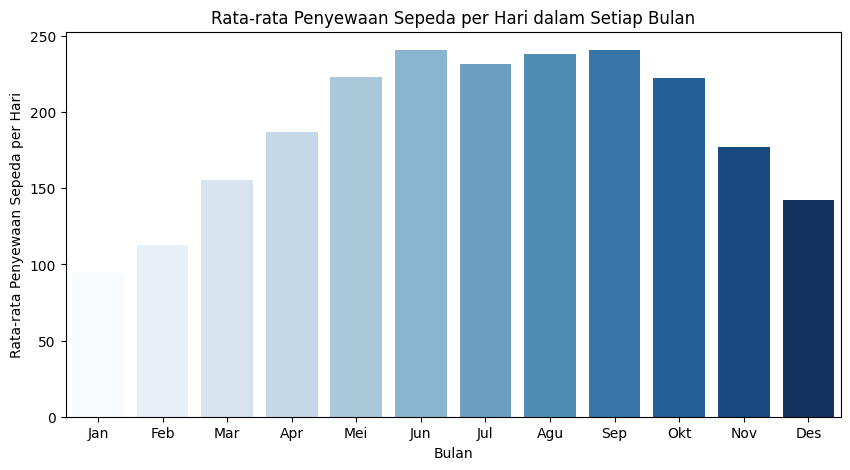

In [354]:
daily_avg_rentals = hour_df.groupby("mnth")["cnt"].mean().reset_index()
daily_avg_rentals = daily_avg_rentals.rename(columns={"cnt": "avg_rentals_per_day"})

plt.figure(figsize=(10,5))
sns.barplot(x="mnth", y="avg_rentals_per_day", data=daily_avg_rentals, hue="mnth", palette="Blues", legend=False)

plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan Sepeda per Hari")
plt.title("Rata-rata Penyewaan Sepeda per Hari dalam Setiap Bulan")
plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])

plt.show()

### Pertanyaan 2: Apakah lebih banyak pelanggan kasual atau pelanggan terdaftar yang menyewa sepeda?

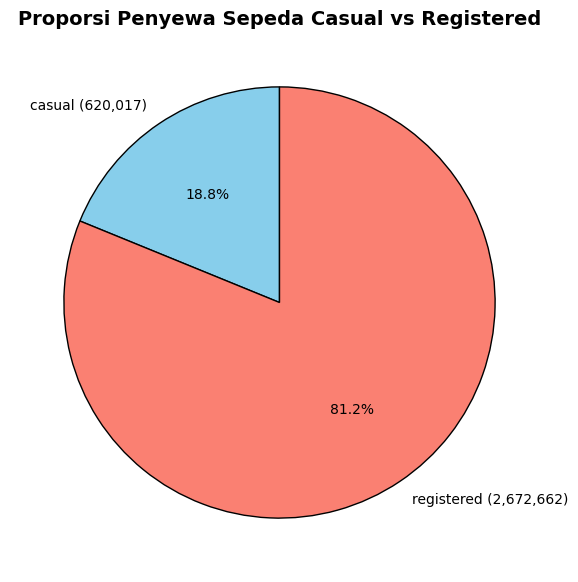

In [355]:
total_users = day_df[["casual", "registered"]].sum().reset_index()
total_users.columns = ["Customer Type", "Total Users"]

sizes = total_users["Total Users"]
labels = [f"{cat} ({val:,.0f})" for cat, val in zip(total_users["Customer Type"], total_users["Total Users"])]
colors = ["skyblue", "salmon"]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("Proporsi Penyewa Sepeda Casual vs Registered", fontsize=14, fontweight="bold")

plt.show()

**Insight:**
- Penyewaan sepeda cenderung meningkat dari Januari hingga Juni, dengan puncaknya di bulan Juni sampai September.
- Kemungkinan besar disebabkan oleh cuaca yang lebih baik selama musim panas, sehingga lebih banyak orang menyewa sepeda untuk beraktivitas di luar ruangan.
- Penyewa sepeda didominasi oleh orang yang sudah terdaftar sebelumnya.

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan data yang telah diolah, diperoleh kesimpulan bahwa rata-rata jumlah penyewaan sepeda per hari berkisar antara 94 hingga 240 penyewa. Jumlah ini menunjukkan adanya variasi permintaan yang dipengaruhi oleh berbagai faktor, seperti kondisi cuaca, hari kerja atau akhir pekan, serta tren musiman.
- Berdasarkan data yang telah diolah, penyewaan sepeda lebih banyak didominasi oleh pengguna yang sudah terdaftar sebanyak 2.672.662 penyewa dibandingkan dengan pengguna kasual sebanyak 620.017 penyewa. Hal ini menunjukkan bahwa orang yang terdaftar cenderung lebih rutin menggunakan layanan penyewaan sepeda, kemungkinan untuk keperluan mobilitas sehari-hari seperti perjalanan ke tempat kerja atau sekolah. Sementara itu, penyewa kasual mungkin lebih banyak menggunakan sepeda untuk rekreasi, yang bisa dipengaruhi oleh faktor seperti cuaca, akhir pekan, atau musim liburan.

Saran untuk meningkatkan layanan penyewaan sepeda: 
1. Memberikan diskon dan reward untuk pengguna yang sudah terdaftar.
2. Memastikan ketersediaan sepeda di area strategis.
3. Mempermudah proses registrasi dan akses ke layanan penyewaan sepeda.
4. Melakukan kolaborasi dengan tempat wisata & event.
5. Menawarkan paket harian/mingguan dengan harga menarik.